<a href="https://colab.research.google.com/github/madhuragandhe/Profit-Loss_Predictor-/blob/master/Predictor_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 BHARATFORG


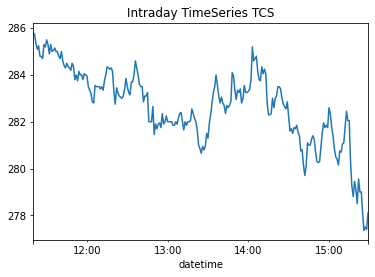




  0%|          | 0/150 [00:00<?, ?it/s]

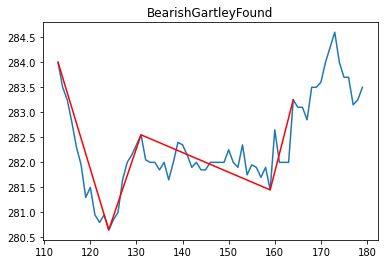

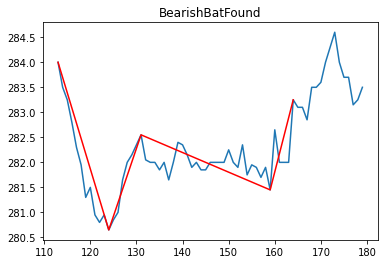




 44%|████▍     | 66/150 [00:02<00:03, 25.43it/s]

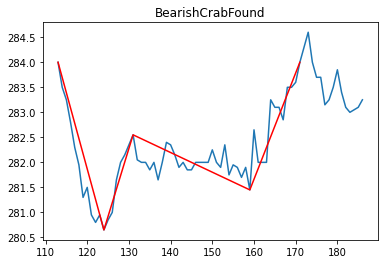




 49%|████▊     | 73/150 [00:07<00:17,  4.43it/s]

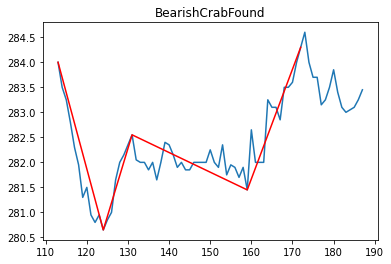




 49%|████▉     | 74/150 [00:08<00:41,  1.81it/s]

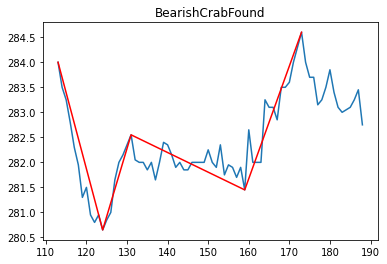




 50%|█████     | 75/150 [00:09<00:57,  1.30it/s]

ValueError: ignored

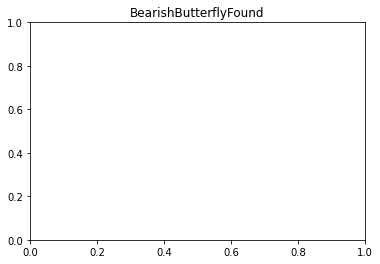

In [4]:
!pip install twelvedata
!pip install telepot

import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from tqdm import tqdm
from twelvedata import TDClient
import telepot



def peak_detect(price,order=10):
    max_idx=list(argrelextrema(price,np.greater,order=order)[0])
    min_idx=list(argrelextrema(price,np.less,order=order)[0])
    idx=min_idx+max_idx + [len(price)-1]
    idx.sort()

    current_idx = idx[-5:]

    start = min(current_idx)
    end = max(current_idx)

    current_pat = price[current_idx]

    return current_idx,current_pat,start,end

# GARTLEY PATTERN
def is_gartley(moves,err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.270 - err_allowed, 1.618 + err_allowed]) * abs(BC)

    # BULLISH PATTERN
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NaN
    # BEARISH PATTERN
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NaN
    else:
        return np.NaN


# BUTTERFLY PATTERN
def is_butterfly(moves,err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.786 - err_allowed, 0.786 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)

    # BULLISH PATTERN
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NaN


    # BEARISH PATTERN
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NaN

    else:
        return np.NaN


# BAT PATTERN
def is_bat(moves,err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.382 - err_allowed, 0.5 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.270 - err_allowed, 1.618 + err_allowed]) * abs(BC)

    # BULLISH PATTERN
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NaN
    # BEARISH PATTERN
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NaN
    else:
        return np.NaN


# CRAB PATTERN
def is_crab(moves,err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.382 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.24 - err_allowed, 3.618 + err_allowed]) * abs(BC)

    # BULLISH PATTERN
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NaN
    # BEARISH PATTERN
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NaN
    else:
        return np.NaN

def telegram_bot_sendtext(bot_token,bot_chatID):
    bot=telepot.Bot(bot_token)
    bot_message="Pattern on its way"
    bot.sendMessage(chat_id=bot_chatID,text=bot_message,disable_notification=False)
    

def telegram_bot_sendphoto(bot_token,bot_chatID,image,cap):
    bot=telepot.Bot(bot_token)
    bot.sendPhoto(chat_id=bot_chatID, photo=open('/content/image.png', 'rb'),caption=cap,disable_notification=False)



# Initialize client - apikey parameter is requiered
td = TDClient(apikey="ade364c28e454d2c8b89e429c187c643")
# scripts=['NSEI','AUROPHARMA','M&M','SUNTV','BHARATFORG','MARUTI','ZEEL','BAJFINANCE','LUPIN','PEL','RELIANCE','SUNPHARMA','HDFC','HINDUNILVR','ITC','ESCORTS']
scripts=['BHARATFORG','AUROPHARMA']
for script in scripts:
  print("\n",script)
  # Construct the necessary time series
  ts = td.time_series(
      symbol=script,
      interval="1min",
      outputsize=250,     #230
      timezone="Asia/Kolkata",
      exchange="NSE"
  )
  # Returns pandas.DataFrame
  data=ts.as_pandas()

  data.to_csv('update1.csv',encoding='utf-8')
  data['close'].plot()

  plt.title('Intraday TimeSeries TCS')
  plt.show()

  data=pd.read_csv('update1.csv')
  price=data['close'].copy()

  bot_token = '1220774747:AAEVs74fxdhpjRbujDTbkbC_ZdBDpeE63ys'
  bot_chatID ='@Z74aNUsVH4'
  # '755922344'
  # '@helpingUGUESS'
  
  # Find Peaks
  err_allowed=10.0/100
  pnl=[]
  trade_dates=[]
  correct_pat=0
  pats=0
  plt.ion()
  for i in tqdm(range(100,len(price))):
      current_idx,current_pat,start,end=peak_detect(price.values[:i])

      XA=current_pat[1] - current_pat[0]
      AB = current_pat[2] - current_pat[1]
      BC = current_pat[3] - current_pat[2]
      CD = current_pat[4] - current_pat[3]

      moves=[XA,AB,BC,CD]

      gart=is_gartley(moves,err_allowed)
      butt=is_butterfly(moves,err_allowed)
      bat=is_bat(moves,err_allowed)
      crab=is_crab(moves,err_allowed)

      harmonics=np.array([gart,butt,bat,crab])
      labelss=['Gartley','Butterfly','Bat','Crab']

      if np.any(harmonics==1) or np.any(harmonics==-1):
          pats+=1
          for j in range(0,len(harmonics)):
              if harmonics[j]==1 or harmonics[j]==-1:
                  if harmonics[j]==-1:
                      sense='Bearish'
                  else:
                      sense='Bullish'
                  label=sense + labelss[j] + 'Found'
                  # telegram_bot_sendtext(bot_token,bot_chatID)

                  start=np.array(min(current_idx))
                  end=np.array(max(current_idx))
                  date=data.iloc[end].name
                  trade_dates=np.append(trade_dates,date)

                  plt.title(label)
                  plt.plot(np.arange(int(start), i + 15), price.values[start:i + 15],)
                  plt.plot(current_idx, current_pat, c='r')
                  plt.savefig("image.png")
                  plt.show()
                  telegram_bot_sendtext(bot_token,bot_chatID)
                  telegram_bot_sendphoto(bot_token,bot_chatID,'image.png',script)
